# **Data Preparation and cleaning**

Importing required libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
data=pd.read_csv('/content/zomato_outlet_final.csv')
data

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."
...,...,...,...,...,...,...,...,...,...,...,...
5428,https://www.zomato.com/pune/murli-pure-veg-1-s...,Murli Pure Veg\r\n ...,Casual Dining,Sinhgad Road,3.1,(22),3.5,(253),"South Indian,Chinese,North Indian,",Rs. 550,NaN
5429,https://www.zomato.com/pune/the-irani-cafe-res...,The Irani Cafe Restaurant\r\n ...,Casual Dining,Viman Nagar,2.9,(80 Reviews),NaN,NaN,"Mughlai,Iranian,",Rs. 800,"Naan, Mutton Keema, Dum Biryani, Irani Chai, B..."
5430,https://www.zomato.com/pune/hotel-shilpa-gavra...,Hotel Shilpa Gavran\r\n ...,Casual Dining,Pimpri,3.8,(90 Reviews),NaN,NaN,"Chinese,Fast Food,North Indian,",Rs. 500,"Mutton Thali, Chicken Sukha"
5431,https://www.zomato.com/pune/mh-12-pav-bhaji-ju...,MH 12 Pav Bhaji & Juice Center\r\n ...,Quick Bites,Sadashiv Peth,3.1,(24),3.1,(439),"Beverages,Chinese,Street Food,Fast Food,",Rs. 250,NaN


In [ ]:
columns=data.columns
columns

Index(['link', 'rest_name', 'rest_type', 'loc', 'dine_rating', 'dine_reviews',
       'delivery_rating', 'delivery_reviews', 'cuisine', 'cost', 'liked'],
      dtype='object')

### Convert rest_type, cuisine, liked from str to list

In [ ]:
for x in ['rest_type','cuisine','liked']:
  for i in range(5433):
    j=data[x][i]
    if type(j)==str:
      l=j.split(',')
      data[x][i]=l
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,[Lounge],"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"[North Indian, Continental, Asian, Finger Food, ]","Rs. 4,300","[Cocktails, Chaat, Beer]"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,[Fine Dining],"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"[North Indian, Mughlai, ]","Rs. 3,500","[Biryani, Veg Platter, Dal Makhani, Butter ..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,[Fine Dining],"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"[Mediterranean, Asian, North Indian, ]","Rs. 3,200","[Pasta, Panipuri, Waffles, Pizza, Salad, ..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,[Fine Dining],"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"[Asian, European, North Indian, ]","Rs. 3,200","[Vanilla Ice Cream, Chaat, Sushi]"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"[Pub, Casual Dining]","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"[Finger Food, Continental, ]","Rs. 3,100","[Cocktails, Beer, Peri Peri Chicken, Fish, ..."


In [ ]:
l=[]
for i in data.index:
  x=data['loc'][i]
  if type(data['loc'][i])==str:
    if ',' in data['loc'][i]:
      data['loc'][i]=x[x.rindex(',')+1:]
  
data['loc']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                 Mundhwa
1                 Mundhwa
2        Bund Garden Road
3                 Mundhwa
4               Hinjewadi
              ...        
5428         Sinhgad Road
5429          Viman Nagar
5430               Pimpri
5431        Sadashiv Peth
5432     B.T. Kawade Road
Name: loc, Length: 5433, dtype: object

### Convert reviews to int

In [ ]:
for i in range(5433):
  j=data['dine_reviews'][i]
  if type(j)==str:
    s=""
    for c in j:
      if c.isnumeric():
        s=s+c
    j=int(s)
  data['dine_reviews'][i]=j
data['dine_reviews']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0       707
1       344
2       541
3        55
4       113
       ... 
5428     22
5429     80
5430     90
5431     24
5432     97
Name: dine_reviews, Length: 5433, dtype: object

### Convert cost to int

In [ ]:
for i in range(5433):
  j=data['cost'][i]
  if type(j)==str:
    s=""
    for c in j:
      if c.isnumeric():
        s=s+c
    j=int(s)
  data['cost'][i]=j
data['cost']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0       4300
1       3500
2       3200
3       3200
4       3100
        ... 
5428     550
5429     800
5430     500
5431     250
5432     500
Name: cost, Length: 5433, dtype: object

### Convert delivery reviews to int

In [ ]:
for x in ['delivery_reviews']:
  for i in range(5433):
    j=data[x][i]
    if type(j)==str:
      s=""
      for c in j:
        if c.isnumeric():
          s=s+c
      j=int(s)
    data[x][i]=j
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,[Lounge],Mundhwa,4.2,707,NaN,NaN,"[North Indian, Continental, Asian, Finger Food, ]",4300,"[Cocktails, Chaat, Beer]"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,[Fine Dining],Mundhwa,4.1,344,NaN,NaN,"[North Indian, Mughlai, ]",3500,"[Biryani, Veg Platter, Dal Makhani, Butter ..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,[Fine Dining],Bund Garden Road,4.5,541,NaN,NaN,"[Mediterranean, Asian, North Indian, ]",3200,"[Pasta, Panipuri, Waffles, Pizza, Salad, ..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,[Fine Dining],Mundhwa,4.0,55,NaN,NaN,"[Asian, European, North Indian, ]",3200,"[Vanilla Ice Cream, Chaat, Sushi]"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"[Pub, Casual Dining]",Hinjewadi,3.9,113,NaN,NaN,"[Finger Food, Continental, ]",3100,"[Cocktails, Beer, Peri Peri Chicken, Fish, ..."
...,...,...,...,...,...,...,...,...,...,...,...
5428,https://www.zomato.com/pune/murli-pure-veg-1-s...,Murli Pure Veg\r\n ...,[Casual Dining],Sinhgad Road,3.1,22,3.5,253,"[South Indian, Chinese, North Indian, ]",550,NaN
5429,https://www.zomato.com/pune/the-irani-cafe-res...,The Irani Cafe Restaurant\r\n ...,[Casual Dining],Viman Nagar,2.9,80,NaN,NaN,"[Mughlai, Iranian, ]",800,"[Naan, Mutton Keema, Dum Biryani, Irani Cha..."
5430,https://www.zomato.com/pune/hotel-shilpa-gavra...,Hotel Shilpa Gavran\r\n ...,[Casual Dining],Pimpri,3.8,90,NaN,NaN,"[Chinese, Fast Food, North Indian, ]",500,"[Mutton Thali, Chicken Sukha]"
5431,https://www.zomato.com/pune/mh-12-pav-bhaji-ju...,MH 12 Pav Bhaji & Juice Center\r\n ...,[Quick Bites],Sadashiv Peth,3.1,24,3.1,439,"[Beverages, Chinese, Street Food, Fast Food, ]",250,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5433 non-null   object 
 1   rest_name         5433 non-null   object 
 2   rest_type         4336 non-null   object 
 3   loc               5433 non-null   object 
 4   dine_rating       4829 non-null   float64
 5   dine_reviews      4829 non-null   object 
 6   delivery_rating   2539 non-null   float64
 7   delivery_reviews  2539 non-null   object 
 8   cuisine           5433 non-null   object 
 9   cost              5433 non-null   object 
 10  liked             2603 non-null   object 
dtypes: float64(2), object(9)
memory usage: 467.0+ KB


### Checking if delivery is available or not

In [ ]:
n=[]
for i in range(5433):
  if data['delivery_rating'].isnull()[i]:
    n.append(True)
  else:
    n.append(False)
data["Delivery_available"]=n
data1=data


Adding extra columns

In [ ]:
l=list(map(len,data1['cuisine']))
data['no. of cuisine']=l
data1=data

In [ ]:
l=[]
for i in data['liked']:
  if type(i)==list:
    l.append(len(i))
  else:
    l.append(0)
data1["no_of_liked"]=l


# **Explonatory analysis & visualization**

## General statistics about the dataset

In [ ]:
data.describe()

,dine_rating,delivery_rating,no. of cuisine,no_of_liked
count,4829.00000,2539.000000,5433.000000,5433.000000
mean,3.66345,3.830681,3.851647,2.608504
std,0.49851,0.345191,1.423066,3.090864
min,2.00000,2.000000,2.000000,0.000000
25%,3.30000,3.600000,3.000000,0.000000
50%,3.70000,3.900000,4.000000,0.000000
75%,4.00000,4.100000,5.000000,7.000000
max,4.90000,4.800000,9.000000,7.000000


## Histograms 

Figure1

Text(0.5, 1.0, 'Histogram for cost')

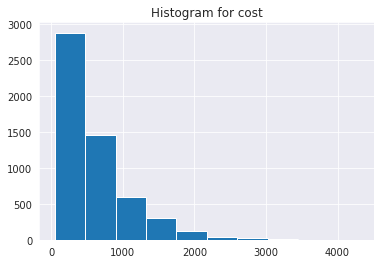

In [ ]:
data['cost'].hist()
plt.title("Histogram for cost")

Text(0.5, 1.0, 'Histogram for diner rating')

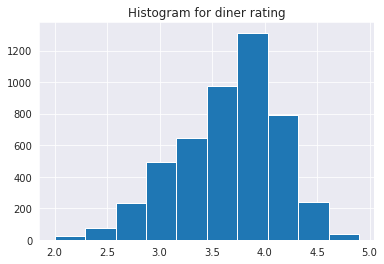

In [ ]:
data1['dine_rating'].hist()
plt.title("Histogram for diner rating")

Text(0.5, 1.0, 'Histogram for no. of dine reviews')

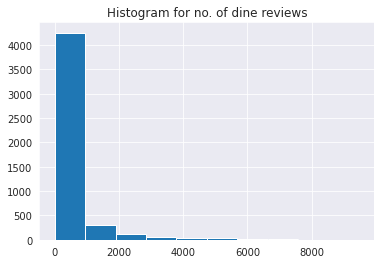

In [ ]:
data1['dine_reviews'].hist()
plt.title("Histogram for no. of dine reviews")

Text(0.5, 1.0, 'Histogram for number of cuisines')

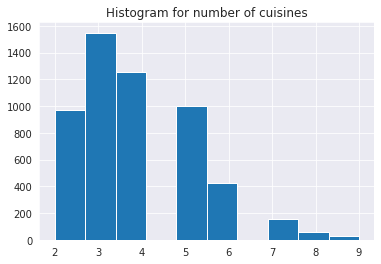

In [ ]:
data1['no. of cuisine'].hist()
plt.title("Histogram for number of cuisines")

## Cost vs Rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


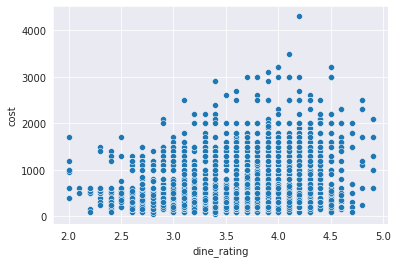

In [ ]:
sns.scatterplot(data1.dine_rating,data1.cost)

Text(0.5, 1.0, 'Cost vs Rating')

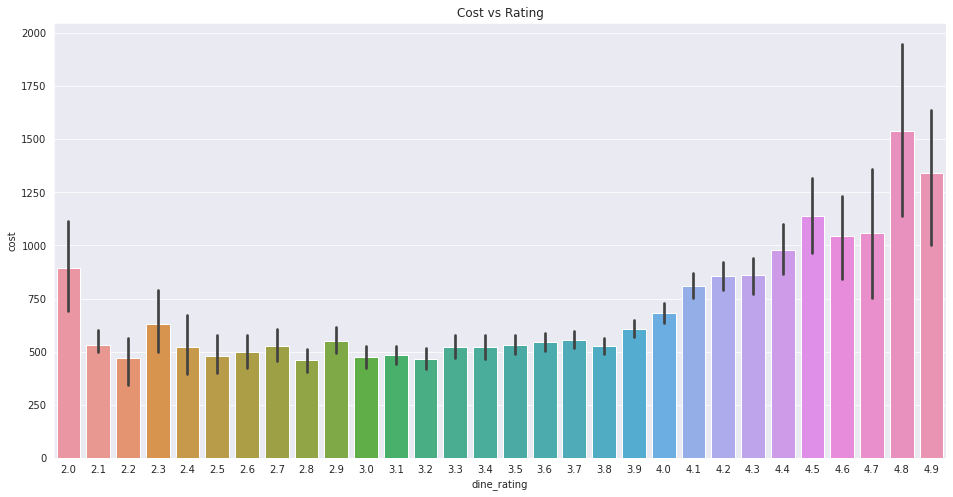

In [ ]:
fig,axes=plt.subplots(1,figsize=(16,8))
sns.barplot(x='dine_rating',y='cost',data=data1)
plt.title("Cost vs Rating")

## Number of restaurants in each area having or not having delivery available

In [ ]:
deli={}
nondel={}
for i in data1.index:
  if not data1['Delivery_available'][i]:
    if data1['loc'][i].strip() in nondel:

      nondel[data1['loc'][i].strip()]+=1
    else:
      nondel.setdefault(data1['loc'][i].strip(),1)
  if data1['Delivery_available'][i]:
    if data1['loc'][i].strip() in deli:

      deli[data1['loc'][i].strip()]+=1
    else:
      deli.setdefault(data1['loc'][i].strip(),1)
print(deli)    
print(nondel)

{'Mundhwa': 42, 'Bund Garden Road': 24, 'Hinjewadi': 13, 'Nagar Road': 13, 'Yerwada': 6, 'DoubleTree By Hilton Hotel': 4, 'Koregaon Park': 44, 'Marriott Suites Pune': 4, 'Senapati Bapat Road': 21, 'Magarpatta': 47, 'Lonavala': 41, 'Kharadi': 109, 'Lavasa': 7, 'Hadapsar': 116, 'Viman Nagar': 138, 'Hotel Royal Orchid Central Kalyani Nagar': 3, 'Della Adventure Resort': 5, 'The Pride Hotel Shivaji Nagar': 3, 'Hotel Orritel Convention & Wedding Resort': 3, 'Aundh': 53, 'Kondhawa': 4, 'Old Mumbai-Pune Highway': 18, 'FC Road': 24, 'Ambrosia Resort and Spa': 1, 'Pancard Clubs': 3, 'Wakad': 134, 'Bavdhan': 46, 'Erandwane': 42, 'Dhole Patil Road': 27, 'Lemon Tree Hotel': 2, 'Baner': 118, 'Sus': 4, 'Pimple Saudagar': 63, 'Yerawada': 13, 'Shivaji Nagar': 34, 'Camp': 3, 'Chakan': 12, 'Khandala': 1, 'Hinjawadi': 122, 'Pune': 5, 'Kothrud': 117, 'Pashan': 19, 'Grand Exotica Business Hotel': 2, 'Pimpri': 56, 'Kalyani Nagar': 50, 'Ravet': 40, 'Balewadi': 20, 'Deccan Gymkhana': 22, 'Talegaon': 12, 'Dhan

Text(0.5, 0, 'Ratings')

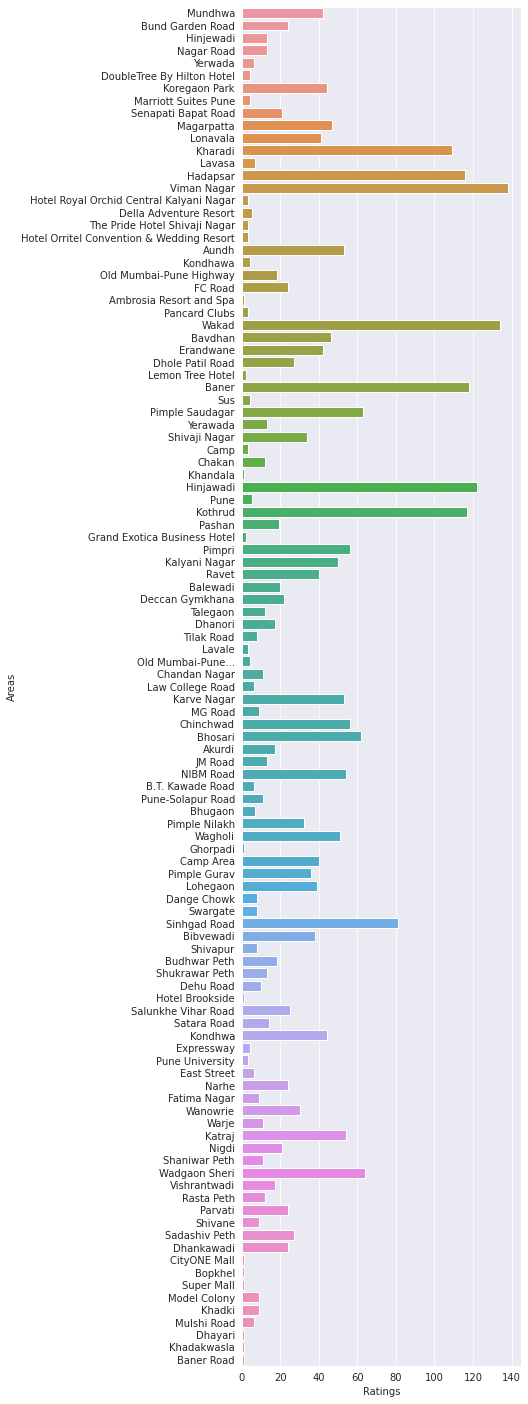

In [ ]:
x=pd.DataFrame()
plt.figure(figsize=(5,25))
x['values']=list(deli.values())
x['names']=list(deli.keys())
x['values']=x['values'].sort_values(ascending=True)
sns.barplot(x='values',y='names',data=x)
plt.ylabel('Areas')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

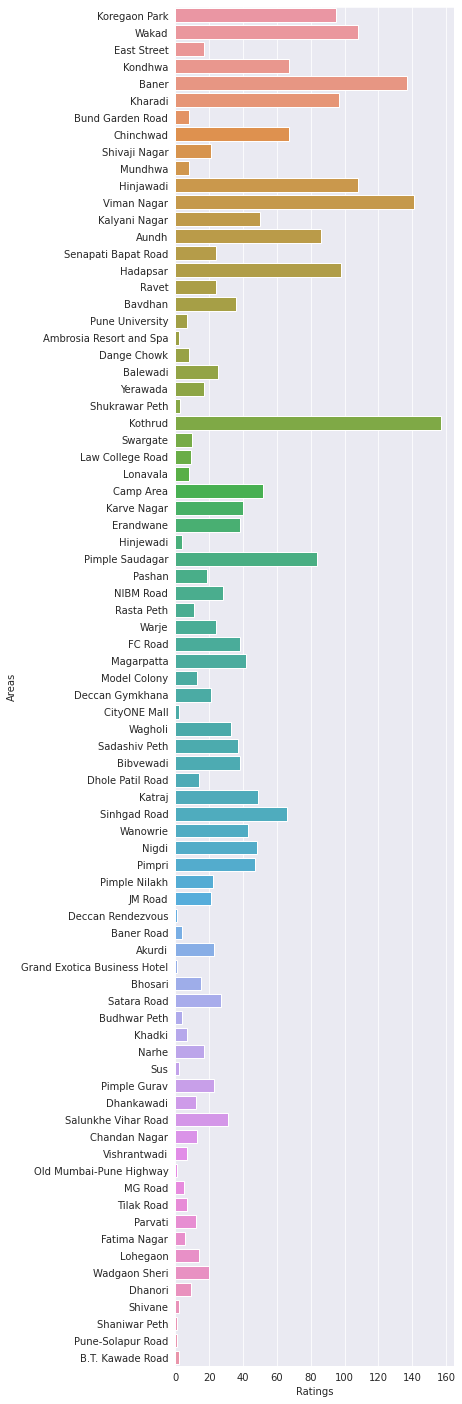

In [ ]:
x=pd.DataFrame()
plt.figure(figsize=(5,25))

x['values']=list(nondel.values())
x['names']=list(nondel.keys())
sns.barplot(x='values',y='names',data=x)
plt.ylabel('Areas')
plt.xlabel('Ratings')

##Ratings of restaurants in different localities

In [ ]:
type1={}
cuisine1={}
numlik={}
area1={}
for i in data1.index:
  types=data1['rest_type'][i]
  cuisines=data1['no. of cuisine'][i]
  areas=data1['loc'][i]
  if type(types)==list:
    for j in types:
      if j in type1:
        type1[j].append(data1['dine_rating'][i])
      else:
        type1.setdefault(j,[data1['dine_rating'][i]])
  if type(cuisines)==list:
    for j in cuisines:
      if j in cuisine1:
        cuisine1[j].append(data1['dine_rating'][i])
      else:
        cuisine1.setdefault(j,[data1['dine_rating'][i]])
  if type(areas)==str:
    j=areas
    if j in area1:
      area1[j].append(data1['dine_rating'][i])
    else:
      area1.setdefault(j,[data1['dine_rating'][i]])
  if data1['no_of_liked'][i] in numlik:
    numlik[data1['no_of_liked'][i]].append(data1['dine_rating'][i])
  else:
    numlik.setdefault(data1['no_of_liked'][i],[data1['dine_rating'][i]])

Text(0.5, 0, 'Ratings')

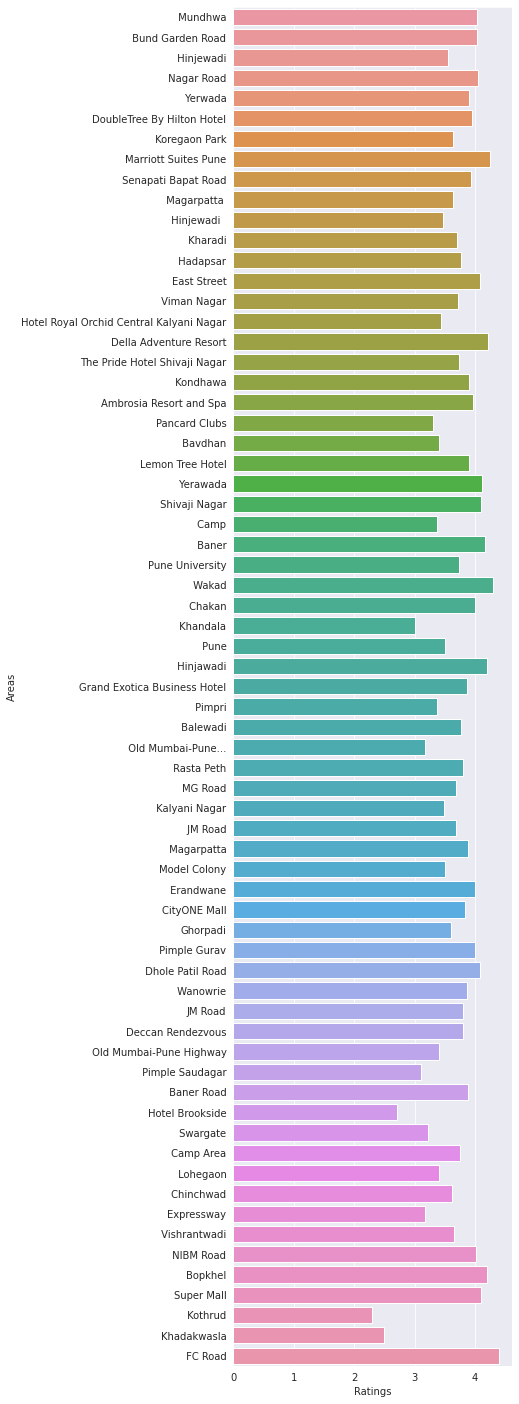

In [ ]:
nx=pd.DataFrame()
names=list(area1.keys())
values=list(area1.values())
plt.figure(figsize=(5,25))
po=[]
for i in range(len(values)):
  values[i]=sum(values[i])/len(values[i])
  if pd.isna(values[i]):
    po.append(i)
po.sort(reverse=True)
for i in po:
  names.pop(i)
  values.pop(i)
nx['values']=values
nx['names']=names
sns.barplot(x='values',y='names',data=nx)
plt.ylabel('Areas')
plt.xlabel('Ratings')

3.6395999999999966

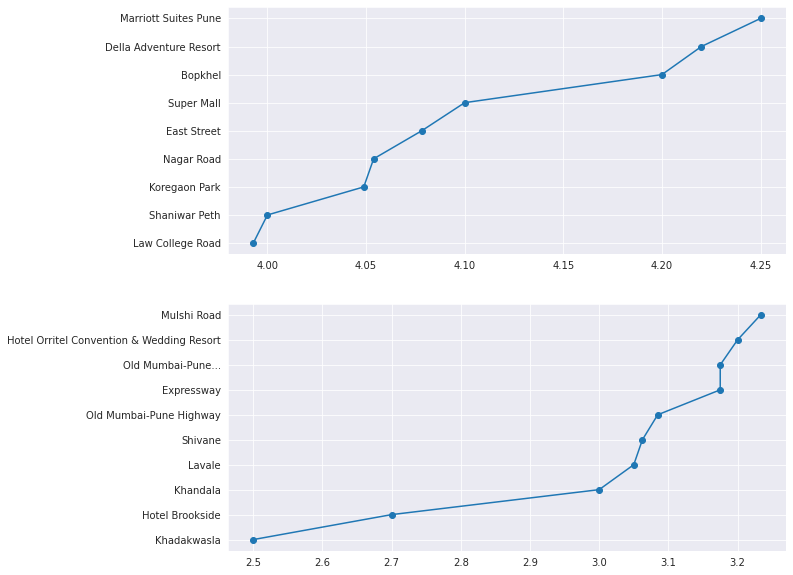

In [ ]:
a=data.groupby('loc')['dine_rating'].mean().sort_values(ascending=True)
b=data.groupby('loc')['dine_rating'].mean().sort_values(ascending=True)
fig,axes=plt.subplots(2,1,figsize=(10,10))

axes[0].plot(a[-10:],a.index[-10:],marker='o');
axes[1].plot(b[0:10],b.index[0:10],marker='o');
a['Kothrud']

## Ratings for different types of restaurants

Text(0.5, 0, 'Rating')

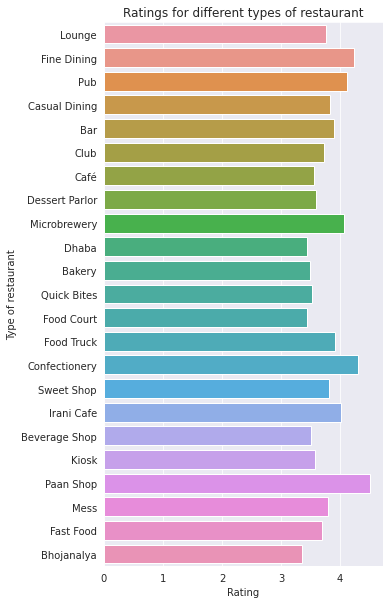

In [ ]:
rest_ty=pd.DataFrame()
names=list(type1.keys())
values=list(type1.values())
plt.figure(figsize=(5,10))
po=[]
for i in range(len(values)):
  c=0;s=0
  for x in values[i]:
    if pd.isna(x):
      pass
    else:
      s=s+x
      c+=1
    values[i]=s/c
rest_ty['names']=names
rest_ty['values']=values
sns.barplot(x='values',y='names',data=rest_ty)
plt.title("Ratings for different types of restaurant")
plt.ylabel('Type of restaurant')
plt.xlabel('Rating')

## Realtion between no. of dishes liked and rating

[1, 2, 3, 4, 5, 6, 7]
[3.5504807692307696, 3.6177664974619272, 3.6362745098039198, 3.6460122699386535, 3.7225433526011553, 3.7381818181818165, 4.016945746818485]


Text(0, 0.5, 'Rating')

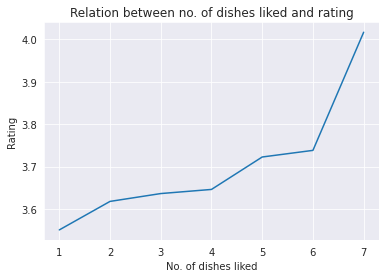

In [ ]:
d={}
for i in sorted(numlik):
  d.setdefault(i,numlik[i])
numlik=d
names=list(numlik.keys())
values=list(numlik.values())

po=[]
for i in range(len(values)):
  values[i]=sum(values[i])/len(values[i])
  if pd.isna(values[i]):
    po.append(i)
po.sort(reverse=True)
for i in po:
  names.pop(i)
  values.pop(i)
print(names)
print(values)

plt.plot(names,values)
plt.title("Relation between no. of dishes liked and rating")
plt.xlabel('No. of dishes liked')
plt.ylabel('Rating')

## Relation bettween no. of dishes liked and cost

In [ ]:
typec1={}
cuisinec1={}
numlikc={}
areac={}
for i in data1.index:
  types=data1['rest_type'][i]
  cuisines=data1['cuisine'][i]
  areas=data1['loc'][i]
  if type(types)==list:
    for j in types:
      if j in typec1:
        typec1[j].append(data1['cost'][i])
      else:
        typec1.setdefault(j,[data1['cost'][i]])
  if type(cuisines)==list:
    for j in cuisines:
      if j in cuisinec1:
        cuisinec1[j].append(data1['cost'][i])
      else:
        cuisinec1.setdefault(j,[data1['cost'][i]])
  if type(areas)==str:
    j=areas
    if j in areac:
      areac[j].append(data1['cost'][i])
    else:
      areac.setdefault(j,[data1['cost'][i]])
  if data1['no_of_liked'][i] in numlikc:
    numlikc[data1['no_of_liked'][i]].append(data1['cost'][i])
  else:
    numlikc.setdefault(data1['no_of_liked'][i],[data1['cost'][i]])

Text(0, 0.5, 'Rating')

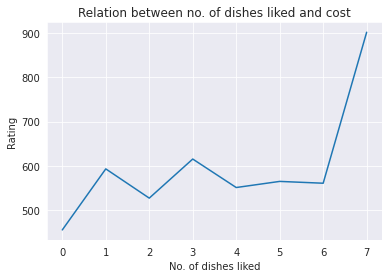

In [ ]:
d={}
for i in sorted(numlikc):
  d.setdefault(i,numlikc[i])
numlikc=d
names=list(numlikc.keys())
values=list(numlikc.values())

po=[]
for i in range(len(values)):
  values[i]=sum(values[i])/len(values[i])
  if pd.isna(values[i]):
    po.append(i)
po.sort(reverse=True)
for i in po:
  names.pop(i)
  values.pop(i)
plt.plot(names,values)
plt.title("Relation between no. of dishes liked and cost")
plt.xlabel('No. of dishes liked')
plt.ylabel('Rating')

## Locality vs cost

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


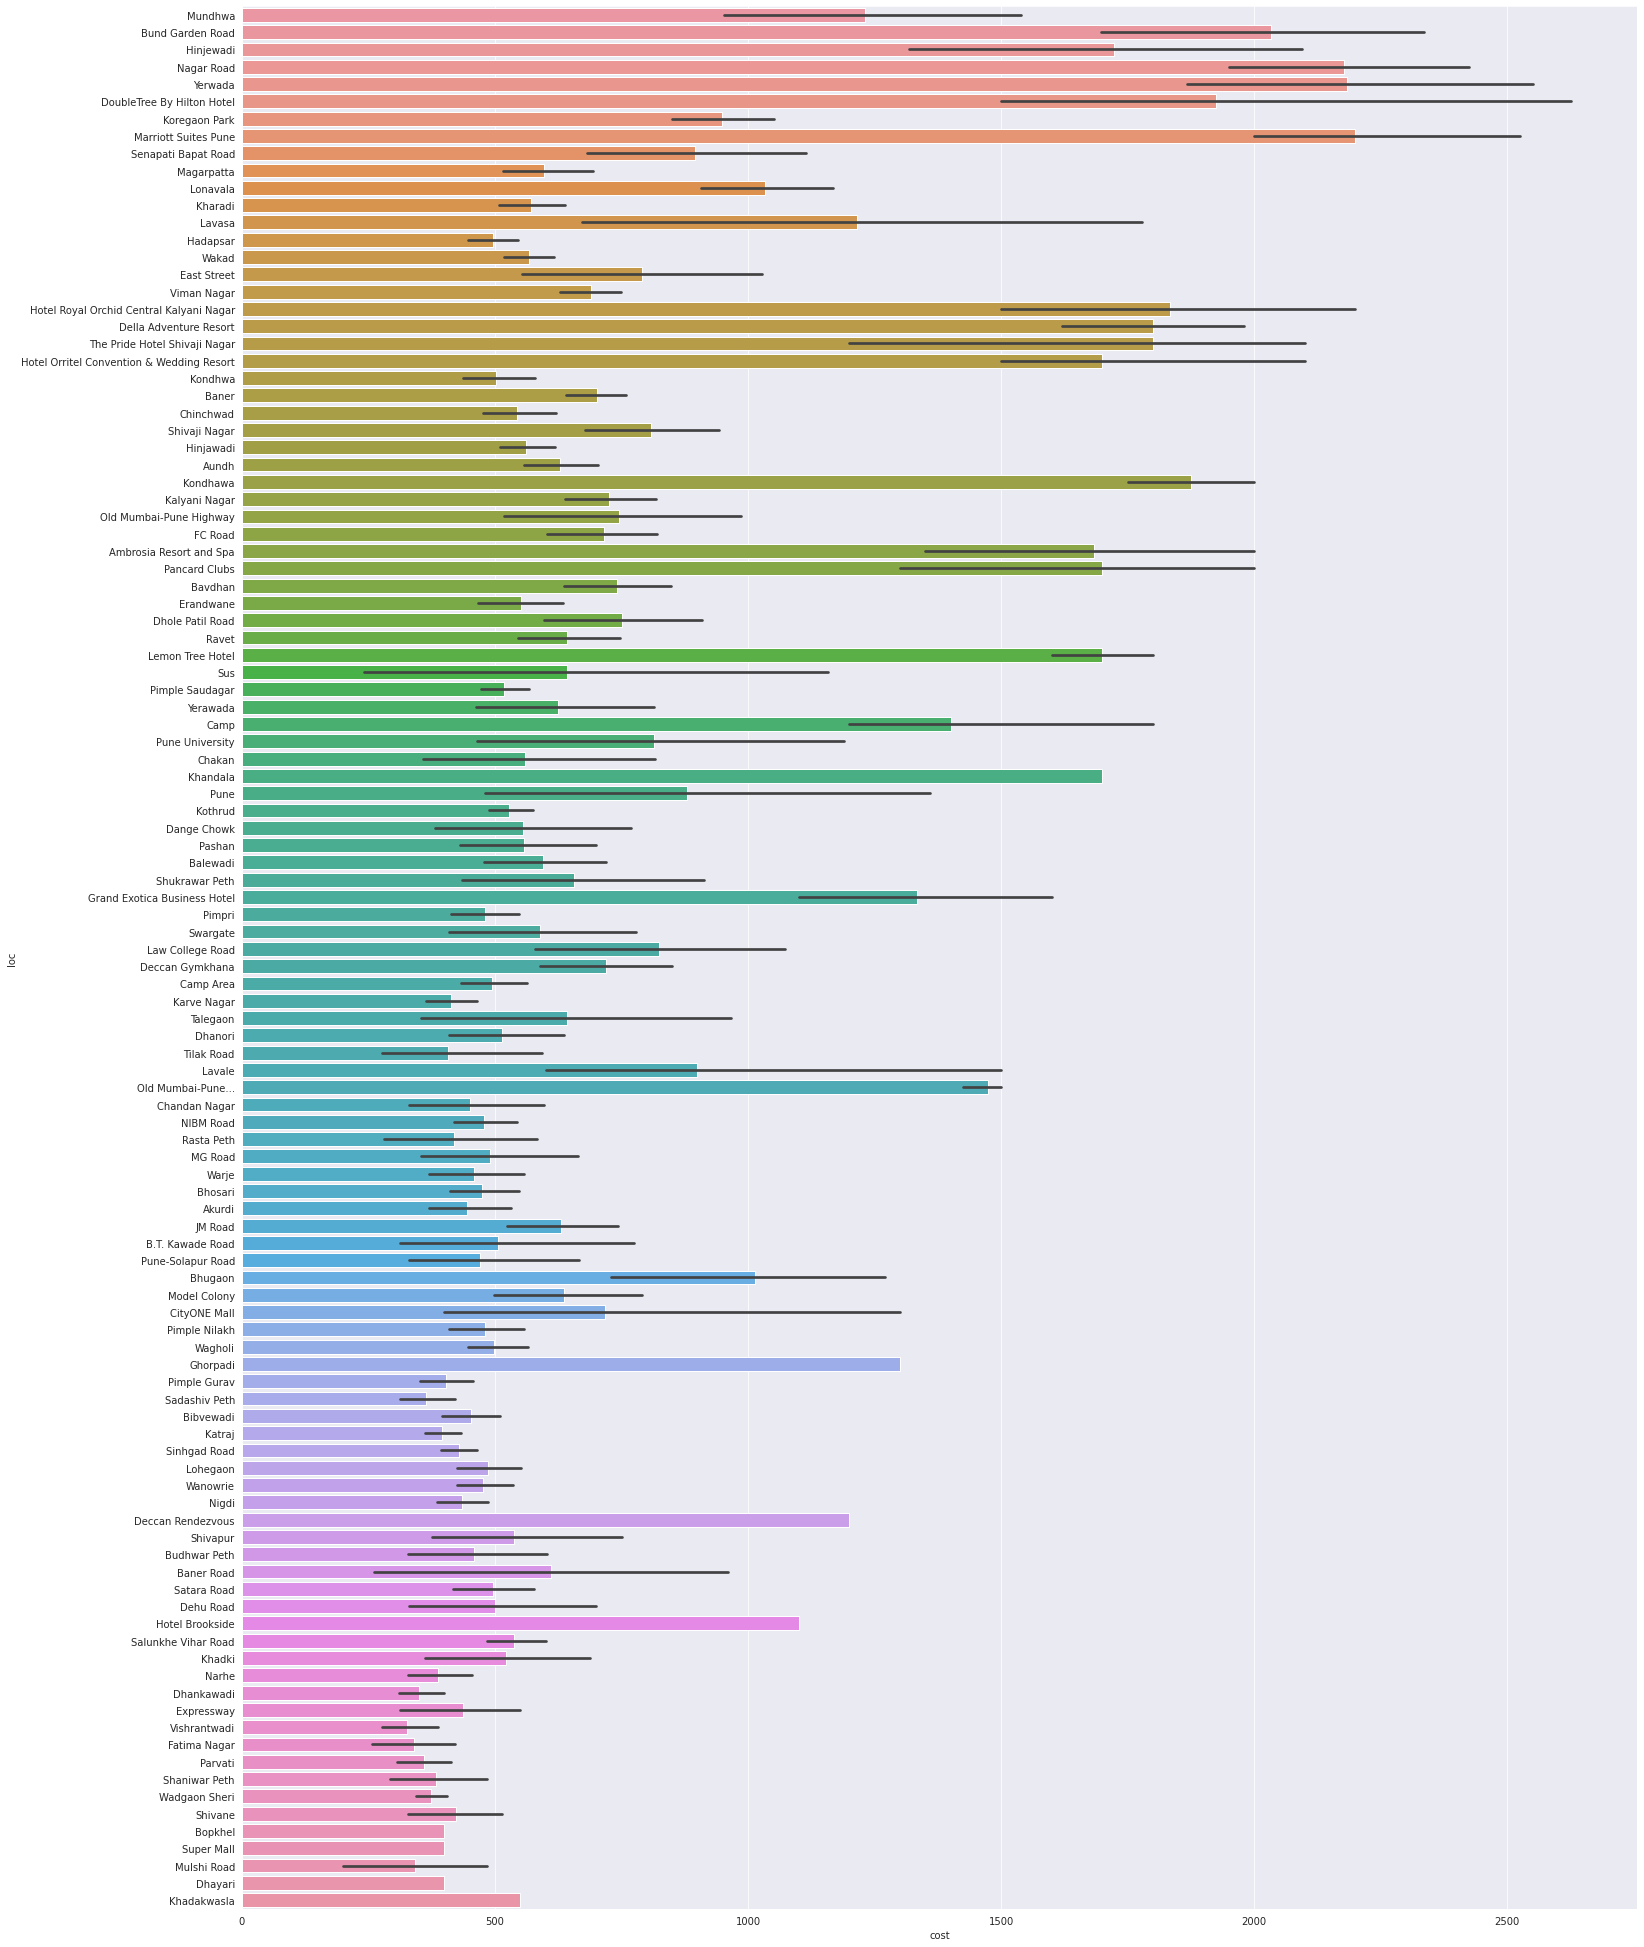

In [ ]:
for i in data1.index:
  data1['loc'][i]=data1['loc'][i].strip()

plt.figure(figsize=(25,35))
sns.barplot(data1.cost,data1['loc'])

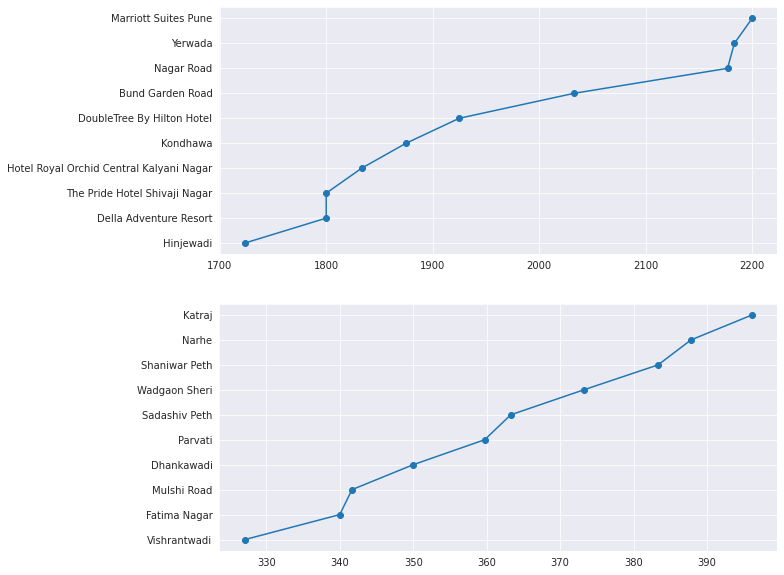

In [ ]:
'''a=data.groupby('loc')['cost'].mean().sort_values(ascending=True)
b=data.groupby('loc')['cost'].mean().sort_values(ascending=True)
fig,axes=plt.subplots(2,1,figsize=(10,10))

axes[0].plot(a[-10:],a.index[-10:],marker='o');
axes[1].plot(b[0:10],b.index[0:10],marker='o');'''
a=data.groupby('loc')['cost'].sum()/data.groupby('loc')['cost'].size()
a=a.sort_values(ascending=True)
fig,axes=plt.subplots(2,1,figsize=(10,10))

axes[0].plot(a[-10:],a.index[-10:],marker='o');
axes[1].plot(a[0:10],a.index[0:10],marker='o');

In [ ]:
typec1['Paan Shop']

[100]

##Cost for different reastaurant types



Text(0, 0.5, 'Types of restaurant')

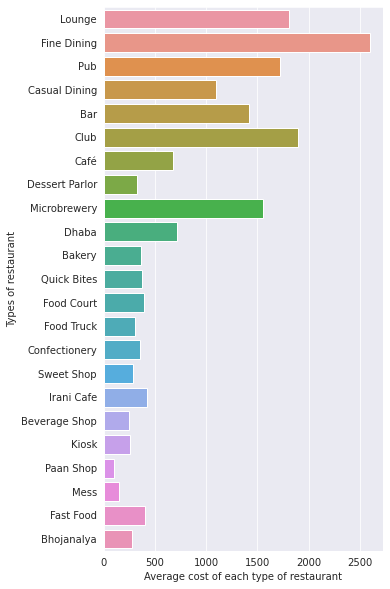

In [ ]:
rest_ty=pd.DataFrame()
names=list(typec1.keys())
values=list(typec1.values())
plt.figure(figsize=(5,10))
po=[]
for i in range(len(values)):
  values[i]=sum(values[i])/len(values[i])
  if pd.isna(values[i]):
    po.append(i)
po.sort(reverse=True)
for i in po:
  names.pop(i)
  values.pop(i)
rest_ty['names']=names
rest_ty['values']=values
sns.barplot(x='values',y='names',data=rest_ty)
plt.xlabel("Average cost of each type of restaurant")
plt.ylabel("Types of restaurant")

# Conclusion



*   Most restaurants are affordable as cost for most of them is less than Rs.1000. 


*  Number of cuisines for most restaurants is around 3 or 4 

*   There are plenty of restaurants in Kothrud, Viman Nagar, Baner, Hinjewadi and Wakad. 
*  Hadapsar, Hinjewadi, Wakad and Kothrud have high number of restaurants that provide delivery service.
*Kothrud has highest number of restaurants that do not provide delivery service


*   Ratings and cost are positively correlated. 
Restaurants with high ratings are costly.
But Cafe and Paan Shop is an exception to this. Cafes with cost around Rs. 600 have a rating of 4.9 while Paan shop costs Rs. 100.




*   Ratings increase with increase in number of dishes liked for each restaurant. 





*   Restaurant types with highest ratings are Paan Shop, Confectionary, Fine dining, and Pub.


* Localities with costly restaurants are Yerwada, Nagar Rd and Bund Garden Road with average cost greater than Rs.2000
* Localities with cheap restaurants are Vishrantwadi, Fatima Nagar, and Mulshi Rd with average cost less than Rs.300
*   Localities with highly rated restaurants are FC Road and Wakad having average rating 4.4 and 4.3 respectively.
* Restaurants in Kothrud have the worst average rating of 3.63.

*   Mundhwa has most expensive restaurants. 


*   Fine dining restaurants are most expensive with its average cost greater than Rs. 2500 while paan shop is least expensive with average cost of Rs.100. 






